In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# lecture du dataset
df=pd.read_csv('FIFA-21 Complete.csv',sep=";")
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [28]:
# recherche de valeurs manquantes
df.isnull().sum()

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [29]:
# On cherche la correlation entre les elements
df.corr()

,player_id,overall,age,hits,potential
player_id,1.000000,-0.392988,-0.726628,-0.043335,0.098938
overall,-0.392988,1.000000,0.341995,0.378900,0.638915
age,-0.726628,0.341995,1.000000,-0.073467,-0.374716
hits,-0.043335,0.378900,-0.073467,1.000000,0.429509
potential,0.098938,0.638915,-0.374716,0.429509,1.000000


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [31]:
# Séparons nos donnees en donnees d'entrainement et de test
x=df[['overall','age','hits']]
y=df['potential']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)


x_train: (14384, 3)
y_train: (14384,)
x_test: (3597, 3)
y_test: (3597,)


In [32]:
# application de la regression lineaire
model=LinearRegression()
model.fit(x_train,y_train)
# mesurons la performance
predicted=model.predict(x_test)

print("MSE",mean_squared_error(y_test,predicted))
print("R squared",metrics.r2_score(y_test,predicted))

MSE 6.601820803044326
R squared 0.8172258120500254


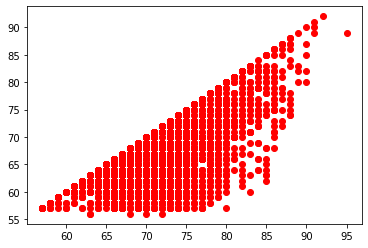

In [33]:
# representation graphique
plt.figure(2)
plt.scatter(y_test,x_test.iloc[:,0].values,color='r')


In [34]:
# pour la regression polynomiale
from sklearn.preprocessing import PolynomialFeatures

# creation du polynome de degre 3
poly = PolynomialFeatures(degree=3)
# on l'applique a notre modele
x_train_ = poly.fit_transform(x_train)
model.fit(x_train_,y_train)
x_test_ = poly.fit_transform(x_test)
predicted = model.predict(x_test_)

# mesurons la performance
print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 3.072831824549321
R squared: 0.9149273574375342
